In [35]:
import librosa
import librosa.display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Audio, display, Image, YouTubeVideo

from sklearn.cluster import DBSCAN

In [36]:
sr = 22050
hop_length = 512

In [37]:
df_f_name = '../data/taylor_df.pkl'
df = pd.read_pickle(df_f_name)
df

,name,song_wave,scene_start_times_sec,onset_times_sec
0,Taylor Swift - White Horse-D1Xr-JFLxik,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0 0.000 1 0.667 2 3.587 3...,"[0.6965986394557823, 1.3467573696145125, 1.648..."
1,Taylor Swift - The Story Of Us-nN6VR92V70M,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0 0.000 1 0.500 2 1.417 3...,"[0.6501587301587302, 0.905578231292517, 1.0913..."
2,Taylor Swift - Delicate-tCXGJQYZ9JA,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0 0.000 1 3.045 2 6.715 3 ...,"[3.8312925170068026, 4.040272108843538, 4.2028..."
3,Taylor Swift - Style--CmadmM5cOk,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0 0.000 1 7.424 2 9.259 3...,"[0.11609977324263039, 10.077460317460318, 10.4..."
4,Taylor Swift - ME! (feat. Brendon Urie of Pani...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0 0.000 1 0.500 2 5.255 3 ...,"[17.29886621315193, 19.11002267573696, 19.6208..."
5,Taylor Swift - Mine-XPBwXKgDTdE,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0 0.000 1 0.375 2 6.548 3...,"[0.5804988662131519, 0.8359183673469388, 1.091..."
6,Taylor Swift - Out Of The Woods-JLf9q36UsBk,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0 0.000 1 2.461 2 12.054 3 ...,"[0.09287981859410431, 6.060408163265306, 8.219..."
7,Taylor Swift - Mean-jYa1eI1hpDE,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0 0.000 1 3.542 2 9.750 3...,"[0.9287981859410431, 2.182675736961451, 4.2724..."
8,Taylor Swift - Fearless-ptSjNWnzpjg,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0 0.000 1 0.626 2 3.587 3...,"[1.0448979591836736, 1.486077097505669, 2.8096..."
9,Taylor Swift - …Ready For It-wIft-t-MQuE,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0 0.000 1 26.276 2 27.778 3 ...,"[0.2089795918367347, 0.9752380952380952, 1.718..."


In [38]:
y = df['song_wave'].iloc[0]
sec_start = 10
n_secs = 15
loc_start = sec_start * sr
loc_end = (sec_start + n_secs) * sr
Audio(y[loc_start:loc_end], rate=sr)

_____________________________________

# Detecting onset (audio)

In [39]:
def get_clipped_onset_env(y, sr, hop_length):
    onset_env = librosa.onset.onset_strength(y=y, sr=sr, hop_length=hop_length, aggregate=np.median)
    clipped_onset_env = np.clip(onset_env, 0, np.percentile(onset_env, 99.9))
    return clipped_onset_env

In [40]:
def get_onset_locs(y, sr, hop_length, val_ofset, windows_per_second, delta, seconds_to_wait, onset_env=None):
    onset_locs = librosa.onset.onset_detect(y, onset_envelope=onset_env, 
                                            sr=sr, hop_length=hop_length, 
                                            pre_max=val_ofset, post_max=val_ofset,
                                            delta=delta, wait=windows_per_second * seconds_to_wait)
    return onset_locs

In [41]:
def plot_onset_detect(onset_env, onset_locs, sr, hop_length, windows_per_second):
    plt.figure(figsize=(15, 4));

    plt.subplot(1, 2, 1);

    times = librosa.frames_to_time(np.arange(len(onset_env)), sr=sr, hop_length=hop_length)
    ax = plt.gca()
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda t, pos: "{}:{}".format(int(t//60), int(t%60))))

    plt.plot(times, onset_env, alpha=0.8, label='Onset strength')
    plt.vlines(times[onset_locs], 0, onset_env.max(), color='r', alpha=0.8, label='Selected peaks')

    plt.legend(frameon=True, framealpha=0.8)

    plt.subplot(1, 2, 2);
    secs_to_next_onset = [(x2 - x1) / windows_per_second
                          for x1, x2 in zip(onset_locs[:-1], onset_locs[1:])]
    plt.plot(secs_to_next_onset);
    plt.ylabel('secs to next onset');
    plt.xlabel('onset index');

    plt.tight_layout();

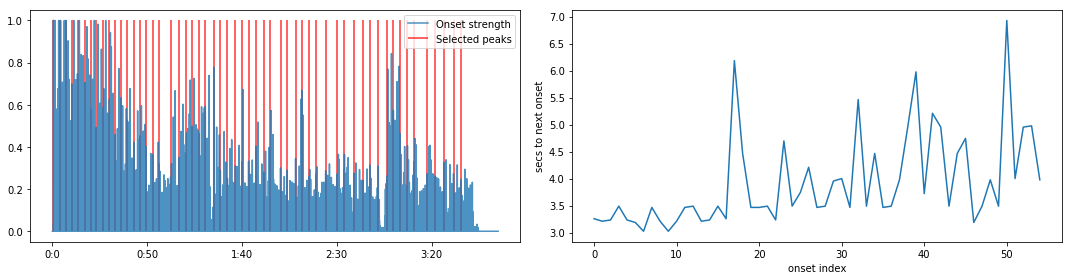

In [42]:
val_ofset = 1
windows_per_second = 43
delta = 0.2
seconds_to_wait = 3

y = df['song_wave'].iloc[5]

onset_env = get_clipped_onset_env(y, sr, hop_length)
onset_locs = get_onset_locs(y, sr, hop_length, val_ofset, windows_per_second, delta, seconds_to_wait, onset_env)
plot_onset_detect(onset_env, onset_locs, sr, hop_length, windows_per_second)


_____________________________________


# Detecting scenes (video)

In [15]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

import scenedetect
from scenedetect.video_manager import VideoManager
from scenedetect.scene_manager import SceneManager
from scenedetect.frame_timecode import FrameTimecode
from scenedetect.stats_manager import StatsManager
from scenedetect.detectors import ContentDetector

In [2]:
calm_down_path = '../data/Taylor_Swift_-_You_Need_To_Calm_Down.mp4'
output_stats_path = '../data/testvideo.stats.csv'

In [3]:
def detect_scenes(input_song_path, output_stats_path):
    video_manager = VideoManager([input_song_path])
    stats_manager = StatsManager()
    scene_manager = SceneManager(stats_manager)
    scene_manager.add_detector(ContentDetector())
    base_timecode = video_manager.get_base_timecode()

    start_time = base_timecode + 20     # 00:00:00.667
    end_time = base_timecode + 200.0     # 00:00:20.000
    # Set video_manager duration to read frames from 00:00:00 to 00:00:20.
    video_manager.set_duration(start_time=start_time, end_time=end_time)

    # Set downscale factor to improve processing speed (no args means default).
    video_manager.set_downscale_factor()

    # Start video_manager.
    video_manager.start()

    # Perform scene detection on video_manager.
    scene_manager.detect_scenes(frame_source=video_manager)

    # Obtain list of detected scenes.
    scene_list = scene_manager.get_scene_list(base_timecode)
    # Like FrameTimecodes, each scene in the scene_list can be sorted if the
    # list of scenes becomes unsorted.

    print('List of scenes obtained:')
    for i, scene in enumerate(scene_list):
        print('    Scene %2d: Start %s / Frame %d, End %s / Frame %d' % (
            i+1,
            scene[0].get_timecode(), scene[0].get_frames(),
            scene[1].get_timecode(), scene[1].get_frames(),))

    stats_manager.save_to_csv(open(output_stats_path, 'w'), base_timecode)
    video_manager.release()

In [4]:
detect_scenes(calm_down_path, output_stats_path)

List of scenes obtained:
    Scene  1: Start 00:00:00.834 / Frame 20, End 00:00:02.836 / Frame 68
    Scene  2: Start 00:00:02.836 / Frame 68, End 00:00:05.589 / Frame 134
    Scene  3: Start 00:00:05.589 / Frame 134, End 00:00:08.383 / Frame 201
    Scene  4: Start 00:00:08.383 / Frame 201, End 00:00:10.844 / Frame 260
    Scene  5: Start 00:00:10.844 / Frame 260, End 00:00:14.097 / Frame 338
    Scene  6: Start 00:00:14.097 / Frame 338, End 00:00:19.686 / Frame 472
    Scene  7: Start 00:00:19.686 / Frame 472, End 00:00:21.897 / Frame 525
    Scene  8: Start 00:00:21.897 / Frame 525, End 00:00:24.942 / Frame 598
    Scene  9: Start 00:00:24.942 / Frame 598, End 00:00:26.818 / Frame 643
    Scene 10: Start 00:00:26.818 / Frame 643, End 00:00:32.157 / Frame 771
    Scene 11: Start 00:00:32.157 / Frame 771, End 00:00:34.159 / Frame 819
    Scene 12: Start 00:00:34.159 / Frame 819, End 00:00:40.874 / Frame 980
    Scene 13: Start 00:00:40.874 / Frame 980, End 00:00:42.334 / Frame 1015
  

In [45]:
df = pd.read_csv(output_stats_path)
df.reset_index(inplace=True)
df.columns = df.iloc[0]
df = df.drop([0])
df = df.convert_objects(convert_numeric=True)
df.head()

C:\Users\Rey\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Frame Number,Timecode,content_val,delta_hue,delta_lum,delta_sat
1,21,00:00:00.876,0.046846,0.020288,0.048131,0.072118
2,22,00:00:00.918,0.094185,0.085903,0.059813,0.136838
3,23,00:00:00.959,0.086501,0.085592,0.075545,0.098364
4,24,00:00:01.001,0.120249,0.136020,0.093069,0.131659
5,25,00:00:01.043,0.202960,0.152103,0.231581,0.225195


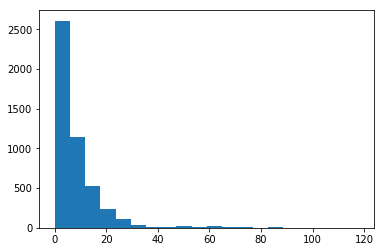

In [47]:
plt.hist(df['delta_hue'], bins=20);

In [46]:
def time_str_to_sec(t_str):
    t = datetime.strptime(t_str, '%H:%M:%S.%f')
    sec = (t - datetime(1900, 1,1)).total_seconds()
    return sec

In [71]:
filtered_scenes_sec = [time_str_to_sec(df['Timecode'].iloc[i]) for (i, a) in list(df['delta_hue'].items()) if a > 30]
len(filtered_scenes_sec)

136

In [73]:
filtered_scenes_sec_with_spaces = ([filtered_scenes_sec[0]] 
                                   + [i_2 for i_1, i_2 
                                      in zip(filtered_scenes_sec[:-1], filtered_scenes_sec[1:])
                                      if i_2 - i_1 >= 2])
len(filtered_scenes_sec_with_spaces)

42

In [74]:
def plot_onset_and_detect(onset_env, onset_locs, filtered_scenes_sec, sr, hop_length, windows_per_second):
    plt.figure(figsize=(9, 6));
    
    plt.subplot(2, 1, 1);

    times = librosa.frames_to_time(np.arange(len(onset_env)), sr=sr, hop_length=hop_length)
    ax = plt.gca()
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda t, pos: "{}:{}".format(int(t//60), int(t%60))))

    plt.plot(times, onset_env, alpha=0.8, label='Onset strength')
    plt.vlines(times[onset_locs], 0, onset_env.max(), color='red', alpha=0.8, label='Selected peaks')

    plt.legend(frameon=True, framealpha=0.8)
    
    plt.subplot(2, 1, 2);
    
    times = librosa.frames_to_time(np.arange(len(onset_env)), sr=sr, hop_length=hop_length)
    ax = plt.gca()
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda t, pos: "{}:{}".format(int(t//60), int(t%60))))

    plt.plot(times, onset_env, alpha=0.8, label='Onset strength')
    plt.vlines(filtered_scenes_sec, 0, onset_env.max(), color='black', alpha=0.8, label='Selected scenes')

    plt.legend(frameon=True, framealpha=0.8)

    plt.tight_layout();

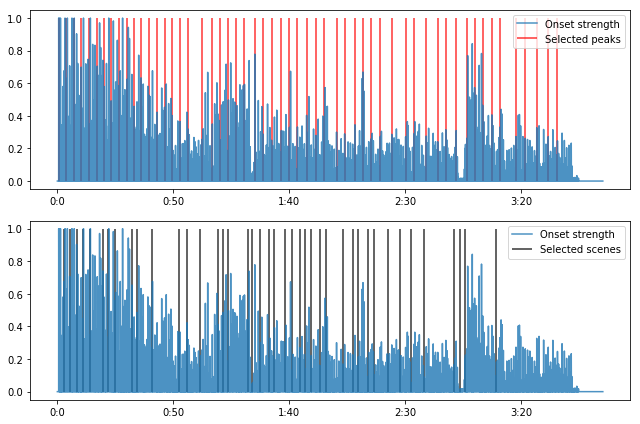

In [75]:
plot_onset_and_detect(onset_env, onset_locs, filtered_scenes_sec_with_spaces, sr, hop_length, windows_per_second)

In [30]:
time_str_to_sec(filtered_scenes[0][1])

2.878

***********************

# Playground

In [ ]:
librosa.display.waveplot(y, sr=sr);

In [ ]:
n_fft = 2048
hop_length = 512
n_mels = 124

In [ ]:
S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)

In [ ]:
plt.figure(figsize=(10, 6));
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

In [ ]:
np.shape(S_DB)

In [ ]:
10132* windows_per_second

In [ ]:
mfccs = librosa.feature.mfcc(y, sr=sr)
librosa.display.specshow(mfccs, sr=sr, x_axis='time');

In [ ]:
np.shape(S_DB)

In [ ]:
np.shape(mfccs)

In [ ]:
spectral_novelty = librosa.onset.onset_strength(y, sr=sr)

frames = np.arange(len(spectral_novelty))
t = librosa.frames_to_time(frames, sr=sr)

plt.figure(figsize=(15, 4))
plt.plot(t, spectral_novelty, 'r-')
# plt.xlim(0, t.max())
plt.xlabel('Time (sec)')
plt.legend(('Spectral Novelty',))

In [ ]:
windows_per_second = 43
start_idxs = list(range(0, len(spectral_novelty), windows_per_second))
sec_in_snip = 10
windows_in_snip = sec_in_snip * windows_per_second

snippets = [spectral_novelty[s_idx: s_idx + windows_in_snip] for s_idx in start_idxs[:-1]]
snippets = np.array([a for a in snippets if len(a) == windows_in_snip])
np.shape(snippets)

In [ ]:
plt.plot(snippets[0,:]);
plt.plot(snippets[100,:]);


In [ ]:
clustering = DBSCAN(eps=3, min_samples=2).fit(snippets)

In [ ]:
clustering = DBSCAN(eps=3, min_samples=2).fit(S_DB.transpose())

In [ ]:
clustering.labels_

In [ ]:
np.shape(S_DB)